# Cleaning Our NBA DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stats = ['pts',
         'min',
         'fgm',
         'fga',
         'fg3m',
         'fg3a',
         'ftm',
         'fta',
         'oreb',f
         'dreb',
         'ast',
         'stl',
         'tov',
         'blk']

In [4]:
# read in per game data from csv folder
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [5]:
df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,1.1,1.7,0.689,1.2,2.3,0.5,0.7,0.5,0.2,3.8
6,154,1996-97,45.0,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.5,1.1,0.420,1.3,2.4,0.3,0.6,0.4,0.2,2.2
7,673,1996-97,30.0,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,1.5,2.5,0.600,1.6,2.3,0.8,1.0,0.7,0.2,6.6
8,1059,1996-97,8.0,29.0,7.9,1.0,2.0,0.500,0.6,0.9,...,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.0,0.0,3.1
9,275,1996-97,81.0,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,2.2,2.7,0.803,0.5,2.4,2.2,2.1,0.5,0.2,14.8


In [6]:
df.tail(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10623,201163,2018-19,51.0,31.0,23.1,2.2,5.4,0.418,1.2,3.1,...,0.4,0.5,0.720,0.9,3.3,1.6,0.9,0.5,0.4,6.0
10624,1628999,2018-19,2.0,22.0,6.5,0.5,2.0,0.250,0.0,0.5,...,0.0,0.0,0.000,0.5,1.0,0.0,0.0,0.5,0.0,1.0
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.8,0.9,0.896,0.2,1.4,1.9,0.6,0.5,0.1,5.9
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.5,0.7,0.700,0.3,1.8,0.5,0.4,0.3,0.1,2.6
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,1.2,1.6,0.746,1.4,2.8,0.9,1.0,0.3,0.9,6.6
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,5.0,6.0,0.832,0.6,4.0,4.5,3.4,1.0,0.4,23.7
10629,1629155,2018-19,1.0,26.0,3.8,0.0,1.0,0.000,0.0,1.0,...,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10630,2585,2018-19,68.0,35.0,12.9,1.3,2.8,0.440,0.0,0.1,...,1.4,1.8,0.782,1.5,2.4,1.3,0.8,0.5,0.3,3.9
10631,1629015,2018-19,6.0,19.0,18.4,2.3,5.7,0.412,1.0,2.7,...,1.0,1.3,0.750,0.5,1.7,1.7,1.0,0.3,0.3,6.7
10632,1627753,2018-19,1.0,23.0,1.0,1.0,1.0,1.000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [7]:
df.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
7454,2544,2012-13,76.0,28.0,37.9,10.1,17.8,0.565,1.4,3.3,...,5.3,7.0,0.753,1.3,6.8,7.3,3.0,1.7,0.9,26.8
8189,101236,2014-15,29.0,32.0,8.8,0.8,1.6,0.478,0.0,0.0,...,0.2,0.4,0.545,0.6,1.1,0.7,0.3,0.3,0.1,1.7
3875,951,2004-05,78.0,29.0,39.3,8.2,19.2,0.428,2.7,7.1,...,4.8,5.5,0.883,1.0,3.4,3.7,2.2,1.1,0.1,23.9
5920,201947,2009-10,51.0,22.0,7.5,1.1,3.0,0.371,0.0,0.1,...,0.5,0.7,0.722,0.4,0.9,0.4,0.5,0.1,0.3,2.7
2272,201,2001-02,43.0,37.0,7.6,0.5,1.2,0.400,0.0,0.0,...,0.2,0.3,0.533,0.6,1.2,0.3,0.3,0.1,0.3,1.1
5183,2058,2007-08,20.0,32.0,7.6,0.2,1.0,0.158,0.0,0.0,...,0.2,0.6,0.250,0.9,1.0,0.2,0.5,0.2,0.1,0.5
1286,957,1998-99,42.0,24.0,11.1,1.3,3.0,0.452,0.0,0.0,...,0.7,1.2,0.600,0.7,1.7,0.1,0.6,0.1,0.3,3.4
8730,2730,2015-16,71.0,30.0,32.1,5.2,8.5,0.620,0.0,0.1,...,3.3,6.7,0.489,3.4,8.4,1.4,2.3,1.0,1.6,13.7
7510,201593,2012-13,62.0,27.0,31.6,6.2,12.0,0.520,0.0,0.0,...,3.9,5.2,0.744,3.7,5.1,0.9,1.6,0.7,0.8,16.3
2803,2462,2002-03,3.0,25.0,1.1,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.3,0.3,0.0,0.0,0.0,0.0


In [8]:
list(df)

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

In [9]:
df_cleaned = df.dropna(how='all')

In [10]:
df_cleaned['gp'].describe()

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

In [11]:
min_gp = df_cleaned['gp'].mean() - (df_cleaned['gp'].std() * 3)

In [12]:
min_gp

-22.712012335693153

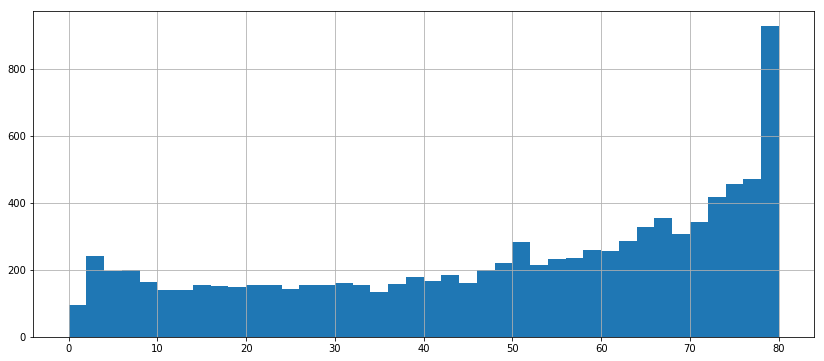

In [13]:
bin_values = np.arange(start=0, stop=82, step=2)
df_cleaned['gp'].hist(bins=bin_values, figsize=[14,6])

In [14]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [15]:
x = df_cleaned['player_id'].count()
y = df_filter['player_id'].count()
print(x - y)

971


# Noramlizing Data Across Seasons

In [16]:
season = (df_filter['season_id'] == '2017-18')

In [17]:
df_2018 =df_filter[season]

In [18]:
df_2018.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10031,204456,2017-18,76.0,26.0,22.5,2.8,5.5,0.499,0.4,0.8,...,0.4,0.5,0.795,0.5,2.5,4.0,1.5,1.2,0.2,6.3
9789,1626185,2017-18,73.0,24.0,22.7,3.0,6.8,0.446,0.5,1.3,...,1.2,1.6,0.767,1.3,3.0,1.0,1.2,0.5,0.7,7.7
9954,2555,2017-18,15.0,37.0,5.0,0.9,1.3,0.684,0.0,0.0,...,0.3,0.9,0.385,0.5,0.9,0.3,0.5,0.0,0.0,2.1
9870,201585,2017-18,71.0,29.0,19.6,3.1,5.5,0.571,0.0,0.0,...,0.5,1.0,0.446,2.1,4.5,1.2,0.7,0.7,0.5,6.7
9722,203095,2017-18,57.0,25.0,32.2,6.5,14.1,0.459,2.2,5.9,...,2.6,3.0,0.867,0.4,2.8,2.9,1.7,0.8,0.3,17.8
9815,203954,2017-18,63.0,24.0,30.4,8.1,16.8,0.483,1.0,3.4,...,5.7,7.4,0.769,2.3,8.7,3.2,3.7,0.6,1.8,22.9
9976,1627775,2017-18,57.0,22.0,16.9,1.6,3.9,0.409,0.3,1.4,...,0.5,0.6,0.765,0.3,1.2,1.4,0.7,0.8,0.2,4.0
9709,202734,2017-18,82.0,29.0,31.5,5.2,10.1,0.508,1.6,3.7,...,0.6,0.8,0.706,0.7,2.2,2.3,1.2,1.0,0.1,12.5
9738,203922,2017-18,23.0,24.0,14.7,1.6,3.7,0.424,0.6,1.5,...,0.4,0.5,0.818,0.5,1.1,0.7,0.2,0.6,0.0,4.1
10053,2225,2017-18,55.0,36.0,19.5,3.2,7.1,0.459,0.2,0.7,...,1.0,1.4,0.705,0.1,1.6,3.5,1.2,0.5,0.0,7.7


In [19]:
df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())

/Users/jman/projects/udemy/nba-pandas-class/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_2018.sort_values('pts_norm', ascending=False).head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_norm
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


In [21]:
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

In [22]:
normalize(df_2018['fgm'])

9563     0.076923
9564     0.615385
9567     0.086538
9569     0.480769
9570     0.288462
9571     0.307692
9573     0.250000
9574     0.125000
9575     0.134615
9576     0.125000
9577     0.288462
9578     0.028846
9579     0.048077
9580     0.423077
9581     0.173077
9582     0.567308
9583     0.211538
9585     0.201923
9586     0.057692
9587     0.298077
9588     0.153846
9589     0.653846
9590     0.134615
9592     0.990385
9593     0.259615
9594     0.259615
9595     0.038462
9596     0.240385
9597     0.105769
9598     0.528846
           ...   
10065    0.221154
10066    0.153846
10067    0.240385
10068    0.153846
10069    0.403846
10071    0.278846
10072    0.259615
10073    0.663462
10074    0.346154
10075    0.240385
10076    0.163462
10077    0.009615
10079    0.807692
10080    0.182692
10084    0.346154
10085    0.307692
10086    0.134615
10087    0.182692
10088    0.423077
10089    0.538462
10090    0.500000
10091    0.173077
10092    0.173077
10093    0.355769
10097    0

In [23]:
cols_to_norm = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [24]:
def vorp(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [25]:
df_2018_norm = vorp(df_2018)

/Users/jman/projects/udemy/nba-pandas-class/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
df_2018_norm.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
9726,1628373,2017-18,78.0,19.0,21.9,2.3,6.4,0.364,0.6,2.0,...,0.142857,0.20,0.068966,0.089109,0.098039,0.149533,0.310680,0.333333,0.34,0.076923
9594,1628469,2017-18,19.0,21.0,16.5,2.8,7.5,0.371,0.8,2.7,...,0.190476,0.27,0.183908,0.207921,0.039216,0.121495,0.106796,0.166667,0.12,0.038462
9787,201162,2017-18,48.0,32.0,14.3,1.0,2.5,0.393,0.6,1.7,...,0.142857,0.17,0.068966,0.069307,0.039216,0.149533,0.155340,0.208333,0.12,0.076923
9627,1627747,2017-18,71.0,23.0,26.2,4.5,10.4,0.435,1.2,3.5,...,0.285714,0.35,0.218391,0.257426,0.137255,0.252336,0.407767,0.500000,0.44,0.115385
10067,1628416,2017-18,56.0,22.0,17.4,2.6,6.8,0.377,1.3,3.6,...,0.309524,0.36,0.091954,0.108911,0.058824,0.168224,0.135922,0.125000,0.14,0.038462
9871,1627739,2017-18,52.0,24.0,29.3,5.5,12.8,0.429,0.8,2.6,...,0.190476,0.26,0.183908,0.217822,0.098039,0.336449,0.582524,0.833333,0.58,0.192308
9606,1626246,2017-18,39.0,29.0,8.7,2.0,3.8,0.534,0.0,0.0,...,0.000000,0.00,0.229885,0.247525,0.235294,0.214953,0.058252,0.125000,0.18,0.115385
9869,1628424,2017-18,32.0,20.0,20.1,2.5,5.9,0.423,0.3,1.2,...,0.071429,0.12,0.091954,0.079208,0.078431,0.084112,0.203883,0.250000,0.28,0.076923
9673,202732,2017-18,58.0,30.0,12.5,0.7,1.8,0.377,0.3,0.9,...,0.071429,0.09,0.000000,0.009901,0.019608,0.093458,0.077670,0.250000,0.06,0.076923
9813,1626202,2017-18,53.0,26.0,10.5,1.5,3.5,0.430,0.5,1.2,...,0.119048,0.12,0.045977,0.049505,0.039216,0.074766,0.067961,0.125000,0.10,0.000000


In [27]:
grouped = df_filter.groupby('season_id')
grouped['pts'].mean()

season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [28]:
df_new = df_filter.groupby(['season_id']).apply(vorp)
df_new.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
2748,2205,2002-03,80.0,21.0,11.8,0.7,1.9,0.351,0.0,0.0,...,0.000000,0.000000,0.012987,0.037037,0.173913,0.151786,0.056180,0.148148,0.166667,0.312500
4322,2056,2005-06,79.0,26.0,27.4,5.2,10.0,0.517,0.0,0.0,...,0.000000,0.000000,0.223404,0.243478,0.621622,0.333333,0.057143,0.080000,0.297297,0.121212
2342,1882,2001-02,80.0,23.0,37.7,6.7,12.6,0.527,0.0,0.0,...,0.000000,0.000000,0.620253,0.616822,1.000000,0.698925,0.212963,0.357143,0.538462,0.571429
3711,2078,2004-05,74.0,27.0,25.5,3.5,7.7,0.449,0.5,1.3,...,0.172414,0.162500,0.241379,0.257143,0.051282,0.230769,0.434783,0.448276,0.304348,0.060606
3348,1508,2003-04,75.0,27.0,27.7,4.9,10.2,0.480,0.0,0.0,...,0.000000,0.000000,0.236111,0.227723,0.369565,0.305556,0.152174,0.250000,0.441860,0.166667
518,685,1997-98,79.0,25.0,21.6,2.8,5.7,0.499,0.0,0.0,...,0.000000,0.000000,0.179487,0.184211,0.264706,0.381443,0.066667,0.192308,0.200000,0.297297
9611,203078,2017-18,82.0,25.0,36.3,8.3,18.1,0.460,2.4,6.5,...,0.571429,0.650000,0.413793,0.445545,0.137255,0.327103,0.436893,0.500000,0.520000,0.153846
4485,200750,2006-07,57.0,22.0,35.3,6.1,13.4,0.456,1.0,2.6,...,0.333333,0.320988,0.395349,0.394231,0.227273,0.306931,0.344828,0.571429,0.463415,0.060606
755,98,1997-98,58.0,30.0,29.4,5.9,13.0,0.455,1.3,3.7,...,0.565217,0.627119,0.282051,0.298246,0.250000,0.340206,0.200000,0.461538,0.400000,0.108108
347,296,1996-97,76.0,27.0,35.9,5.7,12.5,0.456,1.3,3.7,...,0.464286,0.480519,0.421875,0.372340,0.254237,0.350000,0.333333,0.814815,0.522727,0.147059


# Distance Function

In [29]:
def calc_distance(u, v):
    dist = np.sqrt(np.sum((u - v)**2))
    return dist

In [30]:
df1 = pd.read_csv('../nba-stats-csv/player_id_player_name.csv')

In [31]:
df2 = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', usecols=['player_id', 'season_id', 'pts'])

In [32]:
df1.sample(5)

,player_id,player_name
5,201143,Al Horford
165,202328,Greg Monroe
226,203954,Joel Embiid
120,202682,Derrick Williams
402,203497,Rudy Gobert


In [33]:
df2.sample(5)

,player_id,season_id,pts
1203,1727,1998-99,5.6
4362,2562,2005-06,4.5
933,1510,1998-99,9.6
4224,101207,2005-06,1.8
2002,708,2000-01,22.0


In [34]:
df3 = pd.merge(df1, df2, on='player_id', how='left')

In [35]:
df3.sample(5)

,player_id,player_name,season_id,pts
282,2757,Beno Udrih,2010-11,13.7
1824,202689,Kemba Walker,2013-14,17.7
1940,2594,Kyle Korver,2008-09,9.0
1723,101181,Jose Calderon,2008-09,12.8
3170,2754,Tony Allen,2009-10,6.1


In [36]:
df_2019 = df3[df3['season_id'] == '2018-19']

In [37]:
df_2019.sample(5)

,player_id,player_name,season_id,pts
2819,203918,Rodney Hood,2018-19,11.2
549,203991,Clint Capela,2018-19,16.6
1862,201142,Kevin Durant,2018-19,26.0
602,1626156,D'Angelo Russell,2018-19,21.1
69,1626210,Alan Williams,2018-19,3.6


In [38]:
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
curry_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
rudy_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

In [39]:
dame_ppg = dame_df.pts.tolist()[0]
curry_ppg = curry_df.pts.tolist()[0]
rudy_ppg = rudy_df.pts.tolist()[0]

In [40]:
calc_distance(dame_ppg, curry_ppg)

1.5

In [41]:
calc_distance(dame_ppg, rudy_ppg)

9.9

In [43]:
calc_distance(curry_ppg, dame_ppg)

1.5

# Find Player Function

In [44]:
nba_stats = {'first_name': ['Lebron', 'Kyle', 'Lonzo', 'Brandon', 'Josh', 'Lance', 'Michael', 'Tyson', 'Ivica'], 
        'last_name': ['James', 'Kuzma', 'Ball', 'Ingram', 'Hart', 'Stephenson', 'Beasley', 'Chander', 'Zubac'], 
        'ppg': [28.2, 21.1, 14.3, 17.2, 18.2, 11.2, 14.2, 4.5, 6.7], 
        'apg': [12.3, 2.1, 8.9, 2.5, 3.6, 0.2, 1.8, 1.9, 1.5],
        'rpg': [7.1, 5.4, 5.5, 8.1, 3.2, 5.5, 7.7, 2.3, 8.1]}
laker_df = pd.DataFrame(nba_stats, columns = ['first_name', 'last_name', 'ppg', 'apg', 'rpg'])

In [45]:
for row in laker_df.itertuples():
    print(row.first_name, row.last_name, row.ppg)

Lebron James 28.2
Kyle Kuzma 21.1
Lonzo Ball 14.3
Brandon Ingram 17.2
Josh Hart 18.2
Lance Stephenson 11.2
Michael Beasley 14.2
Tyson Chander 4.5
Ivica Zubac 6.7


In [46]:
# read in per game data from csv folder
dataframe = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [47]:
df_example = dataframe.sample(10)

In [48]:
for row in df_example.itertuples():
    print(row.season_id, row.player_id)

2012-13 201942
2010-11 201980
2010-11 201988
2007-08 201151
2008-09 201609
2001-02 1720
1998-99 969
2009-10 201564
2017-18 1628444
2010-11 201155


In [49]:
def find_player(player_id, player_season):
    for row in df_example.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [50]:
df_example

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
7269,201942,2012-13,82.0,23.0,36.7,6.7,15.0,0.445,0.4,1.5,...,4.3,5.2,0.831,0.6,3.3,2.5,1.8,0.9,0.3,18.1
6329,201980,2010-11,8.0,24.0,11.4,2.1,4.4,0.486,0.9,2.4,...,0.0,0.0,0.000,0.4,1.5,0.3,0.6,0.3,0.1,5.1
6568,201988,2010-11,64.0,22.0,12.2,2.1,5.1,0.412,0.7,2.1,...,0.6,0.7,0.766,0.3,0.5,1.7,1.0,0.4,0.0,5.5
4893,201151,2007-08,56.0,23.0,15.5,1.7,4.2,0.401,0.1,0.6,...,0.7,0.9,0.792,0.2,0.8,2.0,1.0,0.5,0.0,4.2
5499,201609,2008-09,55.0,23.0,13.2,1.6,4.1,0.393,0.4,1.0,...,0.9,1.2,0.769,0.6,1.3,2.0,1.3,0.5,0.1,4.5
2489,1720,2001-02,42.0,25.0,16.9,1.9,4.5,0.417,0.0,0.0,...,0.9,1.1,0.826,1.1,2.9,0.6,0.9,0.4,0.3,4.6
1296,969,1998-99,37.0,24.0,14.3,1.8,3.5,0.515,0.0,0.0,...,0.6,0.8,0.759,0.9,2.5,0.8,0.9,0.6,0.7,4.2
6107,201564,2009-10,82.0,22.0,38.0,6.6,14.4,0.458,1.7,4.3,...,2.6,3.2,0.809,0.7,3.0,3.0,2.1,1.2,0.2,17.5
9765,1628444,2017-18,13.0,23.0,8.8,1.2,2.0,0.577,0.2,0.5,...,0.5,1.0,0.462,0.5,1.0,0.6,0.6,0.2,0.1,3.0
6594,201155,2010-11,70.0,25.0,31.2,5.2,11.8,0.439,0.4,1.3,...,4.7,5.4,0.866,1.0,2.1,5.2,2.2,1.1,0.1,15.5


In [51]:
find_player(201151, '2007-08')

Pandas(Index=4893, player_id=201151, season_id='2007-08', gp=56.0, age=23.0, min=15.5, fgm=1.7, fga=4.2, fg_pct=0.401, fg3m=0.1, fg3a=0.6, fg3_pct=0.206, ftm=0.7, fta=0.9, ft_pct=0.792, oreb=0.2, dreb=0.8, ast=2.0, tov=1.0, stl=0.5, blk=0.0, pts=4.2)

In [52]:
find_player(201151, '2021-22')

In [53]:
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [54]:
dataframe.dtypes

player_id      int64
season_id     object
gp           float64
age          float64
min          float64
fgm          float64
fga          float64
fg_pct       float64
fg3m         float64
fg3a         float64
fg3_pct      float64
ftm          float64
fta          float64
ft_pct       float64
oreb         float64
dreb         float64
ast          float64
tov          float64
stl          float64
blk          float64
pts          float64
dtype: object

In [55]:
player = 2544
season = '2012-13'

In [56]:
find_player(dataframe, player, season)

Pandas(Index=7454, player_id=2544, season_id='2012-13', gp=76.0, age=28.0, min=37.9, fgm=10.1, fga=17.8, fg_pct=0.565, fg3m=1.4, fg3a=3.3, fg3_pct=0.406, ftm=5.3, fta=7.0, ft_pct=0.753, oreb=1.3, dreb=6.8, ast=7.3, tov=3.0, stl=1.7, blk=0.9, pts=26.8)

# Calculating Player Similarity

In [57]:
current_player_season = '2016-17'
current_player_id = 201950

In [58]:
# read in per game data from csv folder
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [59]:
df_cleaned = df.dropna(how='all')

In [60]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [61]:
cols_to_norm = ['pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk']

In [62]:
def vorp(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [63]:
df_norm = df_filter.groupby(['season_id']).apply(vorp)

In [64]:
jrue_pts_norm = (df_norm.loc[(df_norm['player_id'] == current_player_id) 
             & (df_norm['season_id'] == current_player_season), 
             'pts_norm']).item()

In [65]:
jrue_pts_norm

0.474025974025974

In [66]:
current_player_stats = [
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'blk_norm']).item()
]

In [67]:
print(current_player_stats)

[0.474025974025974, 0.8530259365994238, 0.5742574257425742, 0.5387931034482759, 0.3658536585365854, 0.42000000000000004, 0.1956521739130435, 0.2293577981651376, 0.1627906976744186, 0.30693069306930687, 0.6486486486486487, 0.75, 0.49999999999999994, 0.2692307692307692]


In [69]:
current_player_vector = np.array([
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'blk_norm']).item()
])

In [70]:
current_player_vector

array([0.47402597, 0.85302594, 0.57425743, 0.5387931 , 0.36585366,
       0.42      , 0.19565217, 0.2293578 , 0.1627907 , 0.30693069,
       0.64864865, 0.75      , 0.5       , 0.26923077])

In [71]:
compared_player_season = '2013-14'
compared_player_id = 203077

In [72]:
compared_player_vector = np.array([
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'blk_norm']).item()
])

In [74]:
compared_player_vector

array([0.21766562, 0.59833795, 0.25      , 0.25      , 0.        ,
       0.01265823, 0.20689655, 0.3030303 , 0.33333333, 0.35106383,
       0.07476636, 0.28      , 0.24324324, 0.21428571])

In [75]:
vfunc = np.vectorize(calc_distance)

In [76]:
distance_vect = vfunc(current_player_vector, compared_player_vector)

In [77]:
distance_vect

array([0.25636036, 0.25468799, 0.32425743, 0.2887931 , 0.36585366,
       0.40734177, 0.01124438, 0.0736725 , 0.17054264, 0.04413314,
       0.57388229, 0.47      , 0.25675676, 0.05494505])

In [78]:
number = np.sum(np.abs(distance_vect)) / len(distance_vect)

In [79]:
number

0.25374793324911765

# Comparing Multiple Players in a For Loop

In [154]:
player_distance = []

In [149]:
df_sample = df_norm.sample(10)

In [150]:
df_sample.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
1362,1112,1999-00,81.0,25.0,24.2,2.1,4.1,0.503,0.0,0.0,...,0.000000,0.000000,0.093333,0.126214,0.604651,0.529412,0.079208,0.333333,0.179487,0.432432
5791,1733,2009-10,72.0,30.0,30.5,6.2,14.3,0.435,1.9,5.7,...,0.760000,0.802817,0.358696,0.431373,0.292683,0.442105,0.136364,0.391304,0.473684,0.142857
364,417,1996-97,82.0,33.0,26.0,3.3,7.4,0.446,0.0,0.3,...,0.000000,0.038961,0.421875,0.382979,0.237288,0.240000,0.087719,0.222222,0.250000,0.058824
2912,1074,2002-03,14.0,31.0,7.3,0.6,1.8,0.320,0.4,1.1,...,0.153846,0.146667,0.025974,0.037037,0.021739,0.017857,0.134831,0.111111,0.083333,0.000000
6215,1713,2009-10,75.0,33.0,30.8,5.8,13.5,0.428,1.6,4.3,...,0.640000,0.605634,0.369565,0.401961,0.097561,0.347368,0.281818,0.304348,0.368421,0.071429
9835,1628404,2017-18,63.0,23.0,23.2,2.8,6.0,0.469,1.2,3.1,...,0.285714,0.310000,0.114943,0.148515,0.137255,0.308411,0.126214,0.291667,0.140000,0.115385
5780,200821,2008-09,63.0,26.0,13.5,1.2,3.4,0.350,0.8,2.6,...,0.285714,0.371429,0.022222,0.028037,0.093023,0.063158,0.036364,0.071429,0.052632,0.034483
9171,201967,2016-17,66.0,30.0,25.0,2.6,5.4,0.485,1.1,2.7,...,0.268293,0.270000,0.021739,0.036697,0.186047,0.306931,0.045045,0.300000,0.053571,0.153846
2079,121,2000-01,79.0,38.0,26.6,3.7,8.7,0.430,0.0,0.0,...,0.000000,0.000000,0.265060,0.244275,0.390244,0.608696,0.122449,0.250000,0.463415,0.324324
6850,2240,2011-12,17.0,30.0,12.4,1.5,3.8,0.406,0.8,2.3,...,0.296296,0.333333,0.057971,0.056604,0.022727,0.048077,0.094017,0.240000,0.153846,0.027027


In [155]:
for row in df_sample.itertuples():
    compared_player_vector = np.array([
    row.pts_norm,
    row.min_norm,
    row.fgm_norm,
    row.fga_norm,
    row.fg3m_norm,
    row.fg3a_norm,
    row.ftm_norm,
    row.fta_norm,
    row.oreb_norm,
    row.dreb_norm,
    row.ast_norm,
    row.stl_norm,
    row.tov_norm,
    row.blk_norm
    ])

    vfunc = np.vectorize(calc_distance)
    distance_vect = vfunc(current_player_vector, compared_player_vector)
    number = np.sum(np.abs(distance_vect)) / len(distance_vect)
    player_distance.append(number)
    player = row.player_id
    print('Done with ' + str(player) + '. Percent error was ' + str(number))

Done with 1112. Percent error was 0.32463137712057255
Done with 1733. Percent error was 0.20029861950110148
Done with 417. Percent error was 0.27151745045333203
Done with 1074. Percent error was 0.3802275681204816
Done with 1713. Percent error was 0.1664301146612275
Done with 1628404. Percent error was 0.20991838323974238
Done with 200821. Percent error was 0.3300402211245747
Done with 201967. Percent error was 0.24554102726200072
Done with 121. Percent error was 0.24432123073469825
Done with 2240. Percent error was 0.30679016778444573


In [156]:
player_distance

[0.32463137712057255,
 0.20029861950110148,
 0.27151745045333203,
 0.3802275681204816,
 0.1664301146612275,
 0.20991838323974238,
 0.3300402211245747,
 0.24554102726200072,
 0.24432123073469825,
 0.30679016778444573]

In [157]:
df_sample['distance'] = player_distance

In [179]:
ranked_df = df_sample.sort_values('distance')

In [181]:
ranked_df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
6215,1713,2009-10,75.0,33.0,30.8,5.8,13.5,0.428,1.6,4.3,...,0.605634,0.369565,0.401961,0.097561,0.347368,0.281818,0.304348,0.368421,0.071429,0.166430
5791,1733,2009-10,72.0,30.0,30.5,6.2,14.3,0.435,1.9,5.7,...,0.802817,0.358696,0.431373,0.292683,0.442105,0.136364,0.391304,0.473684,0.142857,0.200299
9835,1628404,2017-18,63.0,23.0,23.2,2.8,6.0,0.469,1.2,3.1,...,0.310000,0.114943,0.148515,0.137255,0.308411,0.126214,0.291667,0.140000,0.115385,0.209918
2079,121,2000-01,79.0,38.0,26.6,3.7,8.7,0.430,0.0,0.0,...,0.000000,0.265060,0.244275,0.390244,0.608696,0.122449,0.250000,0.463415,0.324324,0.244321
9171,201967,2016-17,66.0,30.0,25.0,2.6,5.4,0.485,1.1,2.7,...,0.270000,0.021739,0.036697,0.186047,0.306931,0.045045,0.300000,0.053571,0.153846,0.245541
364,417,1996-97,82.0,33.0,26.0,3.3,7.4,0.446,0.0,0.3,...,0.038961,0.421875,0.382979,0.237288,0.240000,0.087719,0.222222,0.250000,0.058824,0.271517
6850,2240,2011-12,17.0,30.0,12.4,1.5,3.8,0.406,0.8,2.3,...,0.333333,0.057971,0.056604,0.022727,0.048077,0.094017,0.240000,0.153846,0.027027,0.306790
1362,1112,1999-00,81.0,25.0,24.2,2.1,4.1,0.503,0.0,0.0,...,0.000000,0.093333,0.126214,0.604651,0.529412,0.079208,0.333333,0.179487,0.432432,0.324631
5780,200821,2008-09,63.0,26.0,13.5,1.2,3.4,0.350,0.8,2.6,...,0.371429,0.022222,0.028037,0.093023,0.063158,0.036364,0.071429,0.052632,0.034483,0.330040
2912,1074,2002-03,14.0,31.0,7.3,0.6,1.8,0.320,0.4,1.1,...,0.146667,0.025974,0.037037,0.021739,0.017857,0.134831,0.111111,0.083333,0.000000,0.380228


In [185]:
df1 = pd.read_csv('../nba-stats-csv/player_info.csv')

In [186]:
df_final = pd.merge(ranked_df, df1, on=['player_id', 'season_id'], how='left').drop_duplicates()

In [187]:
df_final = df_final[['player_name', 'player_id', 'season_id', 'distance']]

In [188]:
df_final

,player_name,player_id,season_id,distance
0,Vince Carter,1713,2009-10,0.166430
3,Al Harrington,1733,2009-10,0.200299
6,Josh Hart,1628404,2017-18,0.209918
7,Patrick Ewing,121,2000-01,0.244321
10,Dante Cunningham,201967,2016-17,0.245541
13,Sam Mitchell,417,1996-97,0.271517
16,Gilbert Arenas,2240,2011-12,0.306790
19,Ben Wallace,1112,1999-00,0.324631
22,Yakhouba Diawara,200821,2008-09,0.330040
25,Matt Maloney,1074,2002-03,0.380228


# Weighting Stat Projections

In [189]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19'
]

In [190]:
season_id = season_list[18]
print(season_id)

2014-15


In [191]:
season_id = '2014-15'
value = season_list.index(season_id)
print(value)

18


In [192]:
current_season = season_list[(season_list.index(season_id))]
print(current_season)

2014-15


In [193]:
next_season = season_list[(season_list.index(season_id) + 1)]
print(next_season)

2015-16


In [194]:
ranked_df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
6215,1713,2009-10,75.0,33.0,30.8,5.8,13.5,0.428,1.6,4.3,...,0.605634,0.369565,0.401961,0.097561,0.347368,0.281818,0.304348,0.368421,0.071429,0.166430
5791,1733,2009-10,72.0,30.0,30.5,6.2,14.3,0.435,1.9,5.7,...,0.802817,0.358696,0.431373,0.292683,0.442105,0.136364,0.391304,0.473684,0.142857,0.200299
9835,1628404,2017-18,63.0,23.0,23.2,2.8,6.0,0.469,1.2,3.1,...,0.310000,0.114943,0.148515,0.137255,0.308411,0.126214,0.291667,0.140000,0.115385,0.209918
2079,121,2000-01,79.0,38.0,26.6,3.7,8.7,0.430,0.0,0.0,...,0.000000,0.265060,0.244275,0.390244,0.608696,0.122449,0.250000,0.463415,0.324324,0.244321
9171,201967,2016-17,66.0,30.0,25.0,2.6,5.4,0.485,1.1,2.7,...,0.270000,0.021739,0.036697,0.186047,0.306931,0.045045,0.300000,0.053571,0.153846,0.245541
364,417,1996-97,82.0,33.0,26.0,3.3,7.4,0.446,0.0,0.3,...,0.038961,0.421875,0.382979,0.237288,0.240000,0.087719,0.222222,0.250000,0.058824,0.271517
6850,2240,2011-12,17.0,30.0,12.4,1.5,3.8,0.406,0.8,2.3,...,0.333333,0.057971,0.056604,0.022727,0.048077,0.094017,0.240000,0.153846,0.027027,0.306790
1362,1112,1999-00,81.0,25.0,24.2,2.1,4.1,0.503,0.0,0.0,...,0.000000,0.093333,0.126214,0.604651,0.529412,0.079208,0.333333,0.179487,0.432432,0.324631
5780,200821,2008-09,63.0,26.0,13.5,1.2,3.4,0.350,0.8,2.6,...,0.371429,0.022222,0.028037,0.093023,0.063158,0.036364,0.071429,0.052632,0.034483,0.330040
2912,1074,2002-03,14.0,31.0,7.3,0.6,1.8,0.320,0.4,1.1,...,0.146667,0.025974,0.037037,0.021739,0.017857,0.134831,0.111111,0.083333,0.000000,0.380228


In [195]:
print(current_player_id)
print(current_player_season)

201950
2016-17


In [196]:
test_df = ranked_df.iloc[0]

In [197]:
weight = (1 / test_df.distance)
print(weight)

6.008527976054839


In [198]:
stats = ['pts',
         'min',
         'fgm',
         'fga',
         'fg3m',
         'fg3a',
         'ftm',
         'fta',
         'oreb',
         'dreb',
         'ast',
         'stl',
         'tov',
         'blk']

In [199]:
projected_stats = {}

In [200]:
for col in stats:
    sum_stat = test_df[col] * weight
    projected_stats['porj_' + col] = (sum_stat / weight)

In [201]:
projected_stats

{'porj_pts': 16.6,
 'porj_min': 30.8,
 'porj_fgm': 5.8,
 'porj_fga': 13.500000000000002,
 'porj_fg3m': 1.6,
 'porj_fg3a': 4.3,
 'porj_ftm': 3.3999999999999995,
 'porj_fta': 4.1,
 'porj_oreb': 0.4,
 'porj_dreb': 3.5,
 'porj_ast': 3.0999999999999996,
 'porj_stl': 0.7,
 'porj_tov': 1.4,
 'porj_blk': 0.2}

In [202]:
projected_stats = {}

In [203]:
sum_stat = 0
sum_weight = 0

In [204]:
for row in ranked_df.itertuples():
    weight = (1 / row.distance)
    sum_stat += row.pts * weight
    sum_weight += weight

In [206]:
proj_points = (sum_stat / sum_weight)

In [207]:
proj_points

9.325544151128318

In [208]:
for col in stats:
    sum_stat = 0
    sum_weight = 0
    for index, row in ranked_df.iterrows():
        weight = (1 / row.distance)
        sum_stat += row[col] * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
    projected_stats['proj_' + col] = (sum_stat / sum_weight)

In [209]:
projected_stats

{'player_id': 201950,
 'proj_season_id': '2017-18',
 'proj_pts': 9.325544151128318,
 'proj_min': 23.46100911531315,
 'proj_fgm': 3.3726167052005014,
 'proj_fga': 7.724622189897235,
 'proj_fg3m': 0.8931201131755026,
 'proj_fg3a': 2.5100287294399246,
 'proj_ftm': 1.6666962269874817,
 'proj_fta': 2.2710138382103207,
 'proj_oreb': 0.9214614645053859,
 'proj_dreb': 3.2915118140364137,
 'proj_ast': 1.3572219336220057,
 'proj_stl': 0.648151428659378,
 'proj_tov': 1.0324084205716768,
 'proj_blk': 0.44082832996244653}

# Getting Weighted Average Using Multiple Players Next Season

In [ ]:
for col in stats:
    sum_stat = 0
    sum_weight = 0
    for index, row in ranked_df.iloc[1:11].iterrorws():
        if row.season_id == '2017-18':
            continue
        weight = (1 / row.distance)
        next_season = season_list[(season_list.index(row.season_id) + 1)]
        player_next_season = find_player(ranked_df, row.player_id, next_season)
        if player_next_season == None:
            continue
        sum_stat += getattr(player_next_season, col) * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
    projedted_stats['proj_' + col] = (sum_stat / sum_weight)

# Player Comparison Tool

In [ ]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    return projected_stats

In [ ]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
            
    return projected_stats

In [ ]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    return projected_stats

In [ ]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
        
    return projected_stats

In [ ]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
    
    stats = ['pts',
             'min',
             'fgm',
             'fga',
             'fg3m',
             'fg3a',
             'ftm',
             'fta',
             'oreb',
             'dreb',
             'ast',
             'stl',
             'tov',
             'blk'
             ]
    
    projected_stats = {}
    
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        for index, row in ranked_df.iloc[1:11].iterrows():
            # skip over the row if it was 2017-18 season because we can't take the next
            if row.season_id == '2017-18':
                continue
            # get the players next season
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.season_id) + 1)]
            # find the player row with the id and the next season
            player_next_season = find_player(ranked_df, row.player_id, next_season)
            # if player_next_season doesn't exist then skip
            if player_next_season == None:
                continue
            sum_stat += getattr(player_next_season, col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
        projected_stats['proj_' + col] = (sum_stat / sum_weight)
        
    return projected_stats




In [210]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    weighted_numbers = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        weighted_distance = distance_vect * weighted_numbers
        #number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        number = np.sum(np.abs(weighted_distance)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
    
    stats = ['pts',
             'min',
             'fgm',
             'fga',
             'fg3m',
             'fg3a',
             'ftm',
             'fta',
             'oreb',
             'dreb',
             'ast',
             'stl',
             'tov',
             'blk'
             ]
    
    projected_stats = {}
    
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        for index, row in ranked_df.iloc[1:11].iterrows():
            # skip over the row if it was 2017-18 season because we can't take the next
            if row.season_id == '2017-18':
                continue
            # get the players next season
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.season_id) + 1)]
            # find the player row with the id and the next season
            player_next_season = find_player(ranked_df, row.player_id, next_season)
            # if player_next_season doesn't exist then skip
            if player_next_season == None:
                continue
            sum_stat += getattr(player_next_season, col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
        projected_stats['proj_' + col] = (sum_stat / sum_weight)
        
    return projected_stats




# Projecting 2018-19 Season Stats

In [230]:
ten_players = [201935,
             203081,
             201942,
             201937,
             202339,
             203496,
             203497,
             201567,
             202331,
             202691]

In [231]:
current_player_season = '2017-18'

In [232]:
final_projections = []

In [233]:
# read in per game data from csv folder
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [234]:
df_new = df[df.season_id != '2018-19']

In [236]:
df_new.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
5221,201174,2007-08,26.0,23.0,10.3,1.8,3.2,0.561,0.0,0.1,...,0.6,0.8,0.682,1.3,2.1,0.4,0.5,0.3,0.4,4.1
3096,1506,2003-04,77.0,29.0,13.6,1.5,4.0,0.388,0.7,1.9,...,1.2,1.4,0.894,0.8,2.4,0.7,0.7,0.3,0.2,5.0
7328,202970,2012-13,55.0,28.0,13.4,1.7,3.0,0.551,0.0,0.0,...,0.4,0.9,0.400,1.1,2.5,1.3,0.9,0.4,0.3,3.7
4848,200848,2006-07,8.0,24.0,3.5,0.3,1.0,0.250,0.0,0.0,...,0.1,0.3,0.500,0.1,0.6,0.0,0.3,0.1,0.0,0.6
2278,363,2001-02,57.0,32.0,25.3,2.9,6.4,0.464,0.0,0.2,...,1.2,1.3,0.868,1.3,4.0,2.6,1.5,1.1,0.4,7.1
1493,1562,1999-00,62.0,27.0,17.1,2.2,4.5,0.502,0.0,0.0,...,0.8,1.1,0.742,1.4,2.7,0.8,0.7,0.5,0.2,5.3
1140,441,1998-99,50.0,26.0,26.3,4.5,11.6,0.391,0.7,2.1,...,2.5,3.1,0.803,1.2,2.7,1.2,2.0,1.2,0.4,12.2
9237,203507,2016-17,80.0,22.0,35.6,8.2,15.7,0.521,0.6,2.3,...,5.9,7.7,0.770,1.8,7.0,5.4,2.9,1.6,1.9,22.9
9370,2571,2016-17,67.0,34.0,14.4,2.6,5.9,0.439,0.5,1.5,...,0.6,0.7,0.889,0.2,1.3,1.2,0.7,0.5,0.1,6.3
2879,2213,2002-03,12.0,24.0,4.8,0.2,1.4,0.118,0.0,0.3,...,0.2,0.3,0.500,0.0,0.6,0.3,0.6,0.0,0.4,0.5


In [237]:
df_cleaned = df_new.dropna(how='any')

In [238]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [239]:
df_final = df_filter.groupby(['season_id']).apply(vorp)

In [240]:
df_final.tail(5)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
10098,1628380,2017-18,66.0,20.0,15.8,1.7,4.4,0.398,0.5,1.7,...,0.119048,0.17,0.045977,0.059406,0.137255,0.233645,0.077670,0.125000,0.18,0.192308
10099,203897,2017-18,24.0,23.0,27.3,5.7,14.8,0.383,1.8,5.1,...,0.428571,0.51,0.413793,0.445545,0.078431,0.308411,0.291262,0.416667,0.36,0.076923
10100,2216,2017-18,59.0,36.0,25.6,6.1,12.9,0.473,0.9,2.5,...,0.214286,0.25,0.160920,0.178218,0.313725,0.457944,0.213592,0.291667,0.40,0.076923
10101,2585,2017-18,69.0,34.0,14.1,2.2,3.8,0.564,0.0,0.0,...,0.000000,0.00,0.126437,0.128713,0.254902,0.299065,0.155340,0.250000,0.20,0.076923
10102,1627753,2017-18,18.0,22.0,6.9,0.3,1.8,0.188,0.1,1.1,...,0.023810,0.11,0.045977,0.069307,0.058824,0.065421,0.009709,0.041667,0.12,0.307692


In [241]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19']

In [242]:
# function to calculate distance between two points
def calc_distance(u, v):
    dist = np.sqrt(np.sum((u - v)**2))
    return dist

# create a function to find the player and the next season
def find_player(df, player_id, season):
    # replaces for loop
    for row in df.itertuples():
        if season == row.season_id and player_id == row.player_id:
            return row

In [243]:
for baller_id in ten_players:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
    final_projections.append(projections)

Projecting player_id 201935 for season 2018-19
Projecting player_id 203081 for season 2018-19
Projecting player_id 201942 for season 2018-19
Projecting player_id 201937 for season 2018-19
Projecting player_id 202339 for season 2018-19
Projecting player_id 203496 for season 2018-19
Projecting player_id 203497 for season 2018-19
Projecting player_id 201567 for season 2018-19
Projecting player_id 202331 for season 2018-19
Projecting player_id 202691 for season 2018-19


In [244]:
final_projections

[{'player_id': 201935,
  'proj_season_id': '2018-19',
  'proj_pts': 27.43275293901888,
  'proj_min': 37.27557007949852,
  'proj_fgm': 8.739531247293517,
  'proj_fga': 19.326112130789124,
  'proj_fg3m': 2.4416014820332617,
  'proj_fg3a': 6.9208700867352,
  'proj_ftm': 7.523821728165839,
  'proj_fta': 8.988620200157476,
  'proj_oreb': 0.8919017968376578,
  'proj_dreb': 5.16723234850663,
  'proj_ast': 6.767128563607211,
  'proj_stl': 1.5624887764528956,
  'proj_tov': 3.839135611297285,
  'proj_blk': 0.545122647769738},
 {'player_id': 203081,
  'proj_season_id': '2018-19',
  'proj_pts': 23.961182438944764,
  'proj_min': 36.33941004840615,
  'proj_fgm': 8.002104609029969,
  'proj_fga': 18.622465082207462,
  'proj_fg3m': 2.1210361807969726,
  'proj_fg3a': 6.107645069732469,
  'proj_ftm': 5.836247539016859,
  'proj_fta': 6.92643264956056,
  'proj_oreb': 0.7750174504531169,
  'proj_dreb': 3.456128912076116,
  'proj_ast': 5.515011529210231,
  'proj_stl': 1.1604155587492513,
  'proj_tov': 2.8427

In [245]:
test_projections = pd.DataFrame(final_projections)

In [246]:
test_projections.sample(5)

,player_id,proj_ast,proj_blk,proj_dreb,proj_fg3a,proj_fg3m,proj_fga,proj_fgm,proj_fta,proj_ftm,proj_min,proj_oreb,proj_pts,proj_season_id,proj_stl,proj_tov
2,201942,3.592760,0.252092,3.305773,3.257628,1.107141,16.349121,7.228287,6.510371,5.398346,34.625592,0.834226,20.980942,2018-19,1.001176,2.094358
4,202339,5.186655,0.363611,3.010688,3.886606,1.431105,12.956197,5.598953,3.824601,3.203014,32.946470,0.557472,15.815523,2018-19,1.367533,2.121440
1,203081,5.515012,0.407752,3.456129,6.107645,2.121036,18.622465,8.002105,6.926433,5.836248,36.339410,0.775017,23.961182,2018-19,1.160416,2.842701
7,201567,1.835934,0.609121,6.533117,4.407987,1.680536,12.315330,5.537316,3.961869,3.292168,31.065801,1.789662,16.005472,2018-19,0.752829,1.633219
0,201935,6.767129,0.545123,5.167232,6.920870,2.441601,19.326112,8.739531,8.988620,7.523822,37.275570,0.891902,27.432753,2018-19,1.562489,3.839136


In [247]:
df_names = pd.read_csv('../nba-stats-csv/player_id_player_name.csv')

In [248]:
final_stat_df = pd.merge(test_projections, df_names, left_on=['player_id'], right_on=['player_id'], how='inner')

In [249]:
round(final_stat_df,1)

,player_id,proj_ast,proj_blk,proj_dreb,proj_fg3a,proj_fg3m,proj_fga,proj_fgm,proj_fta,proj_ftm,proj_min,proj_oreb,proj_pts,proj_season_id,proj_stl,proj_tov,player_name
0,201935,6.8,0.5,5.2,6.9,2.4,19.3,8.7,9.0,7.5,37.3,0.9,27.4,2018-19,1.6,3.8,James Harden
1,203081,5.5,0.4,3.5,6.1,2.1,18.6,8.0,6.9,5.8,36.3,0.8,24.0,2018-19,1.2,2.8,Damian Lillard
2,201942,3.6,0.3,3.3,3.3,1.1,16.3,7.2,6.5,5.4,34.6,0.8,21.0,2018-19,1.0,2.1,DeMar DeRozan
3,201937,4.9,0.2,2.6,3.2,1.2,9.6,4.3,2.8,2.4,28.7,0.4,12.0,2018-19,1.1,2.2,Ricky Rubio
4,202339,5.2,0.4,3.0,3.9,1.4,13.0,5.6,3.8,3.2,32.9,0.6,15.8,2018-19,1.4,2.1,Eric Bledsoe
5,203496,1.9,0.4,3.2,4.0,1.4,8.5,3.6,1.5,1.1,27.5,0.8,9.6,2018-19,1.3,1.1,Robert Covington
6,203497,1.1,2.6,7.4,0.0,0.0,9.7,5.1,5.0,3.4,33.8,3.0,13.6,2018-19,0.6,2.0,Rudy Gobert
7,201567,1.8,0.6,6.5,4.4,1.7,12.3,5.5,4.0,3.3,31.1,1.8,16.0,2018-19,0.8,1.6,Kevin Love
8,202331,4.3,0.4,3.9,6.3,2.4,15.0,6.3,3.9,3.1,34.6,0.9,18.1,2018-19,1.3,2.2,Paul George
9,202691,2.5,0.4,3.1,6.1,2.5,14.9,6.6,2.7,2.3,32.8,0.5,18.1,2018-19,0.9,1.6,Klay Thompson


In [250]:
player_df = pd.read_csv('../nba-stats-csv/player_info.csv')

In [251]:
player_filter = player_df[player_df['season_id'] == '2017-18']

In [252]:
player_ids_2018 = player_filter['player_id'].tolist()

In [253]:
player_ids_2018

[201166,
 203932,
 1626151,
 1628935,
 1627846,
 203940,
 201143,
 2744,
 202329,
 1626210,
 202692,
 1628409,
 203518,
 1627936,
 203458,
 1627816,
 1628035,
 203459,
 101161,
 203083,
 2738,
 201281,
 203460,
 101106,
 1626150,
 1628510,
 203952,
 1627790,
 1626148,
 203076,
 201229,
 1628469,
 1628499,
 203382,
 201167,
 203085,
 202340,
 1628389,
 203463,
 1628500,
 1627732,
 202687,
 201933,
 1626246,
 201628,
 1626171,
 203992,
 202711,
 203078,
 201148,
 1627742,
 201943,
 203464,
 1627362,
 1627744,
 201572,
 203998,
 1627854,
 1627741,
 203710,
 203468,
 101139,
 1628403,
 1626166,
 1627747,
 2546,
 1626224,
 202718,
 101112,
 1628429,
 1627767,
 1627778,
 1628449,
 1626191,
 101108,
 203991,
 203469,
 202332,
 201147,
 202709,
 201584,
 1626245,
 1626156,
 201571,
 1628391,
 1626177,
 1627745,
 203081,
 2863,
 1627814,
 1628422,
 1627772,
 1628464,
 201568,
 201980,
 201967,
 203957,
 1627863,
 203967,
 203121,
 201589,
 201954,
 1626199,
 1628021,
 204065,
 2561,
 202722,
 1

In [ ]:
for baller_id in player_ids_2018:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
    final_projections.append(projections)

In [ ]:
player_info_columns = [
    'player_name',
    'player_id',
    'proj_season_id'
]

In [ ]:
player_info = final_stat_df[player_info_columns]

In [ ]:
final_stat_df.to_csv('../nba-stats-csv/player_proj_df.csv', index=False)
player_info.to_csv('../nba-stats-csv/player_info_df.csv', index=False)